# Cargar datos

In [2]:
library("caret")
library("RWeka")
library("RWekajars")
library("rJava")
library("kohonen")
require("mclust")

In [3]:
data <- read.arff("credit_g_smoothed.arff")
#write.table(data, file = "foo.csv", sep = ",", col.names = NA, qmethod = "double")
head(data)

checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,⋯,real estate,67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,⋯,real estate,22,none,own,1,skilled,1,none,yes,bad
no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,⋯,real estate,49,none,own,1,unskilled resident,2,none,yes,good
<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,⋯,life insurance,45,none,for free,1,skilled,2,none,yes,good
<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,⋯,no known property,53,none,for free,2,skilled,2,none,yes,bad
no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,⋯,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good


# Aplicando método particional | Simple K-means
Aplicamos K-means de Weka.

Mostrar parametros configurables del K-means

In [4]:
WOW(SimpleKMeans)

-N <num>
        Number of clusters.  (default 2).
	Number of arguments: 1.
-init   Initialization method to use.  0 = random, 1 = k-means++, 2 =
        canopy, 3 = farthest first.  (default = 0)
	Number of arguments: 1.
-C      Use canopies to reduce the number of distance calculations.
-max-candidates <num>
        Maximum number of candidate canopies to retain in memory at any
        one time when using canopy clustering.  T2 distance plus, data
        characteristics, will determine how many candidate canopies are
        formed before periodic and final pruning are performed, which
        might result in exceess memory consumption. This setting avoids
        large numbers of candidate canopies consuming memory. (default
        = 100)
	Number of arguments: 1.
-periodic-pruning <num>
        How often to prune low density canopies when using canopy
        clustering.  (default = every 10,000 training instances)
	Number of arguments: 1.
-min-density
        Minimum canopy dens

In [5]:
SimpleKMeans(data, control = NULL)


kMeans

Number of iterations: 7
Within cluster sum of squared errors: 6895.635252456921

Initial starting points (random):

Cluster 0: <0,24,'all paid','used car',3632,<100,1<=X<4,1,'female div/dep/mar',guarantor,4,car,22,bank,rent,1,skilled,1,none,no,good
Cluster 1: 'no checking',18,'critical/other existing credit',radio/tv,1169,'no known savings',1<=X<4,4,'male single',none,3,'life insurance',29,none,own,2,skilled,1,yes,yes,good

Missing values globally replaced with mean/mode

Final cluster centroids:
                                                               Cluster#
Attribute                                  Full Data                  0                  1
                                            (1300.0)            (610.0)            (690.0)
checking_status                                   <0                 <0        no checking
duration                                     21.7011            23.8172            19.8303
credit_history                         existing paid 

# Aplicando método jerárquico | Cobweb

Mostrar parametros configurables del Cobweb

In [6]:
WOW("Cobweb")

-A <acuity>
        Acuity.  (default=1.0)
	Number of arguments: 1.
-C <cutoff>
        Cutoff.  (default=0.002)
	Number of arguments: 1.
-save-data
        Save instance data.
-S <num>
        Random number seed.  (default 42)
	Number of arguments: 1.
-output-debug-info
        If set, clusterer is run in debug mode and may output
        additional info to the console
-do-not-check-capabilities
        If set, clusterer capabilities are not checked before clusterer
        is built (use with caution).

In [7]:
# configure cuoff
Cobweb(data, control = Weka_control(C = 0.3))

Number of merges: 36
Number of splits: 26
Number of clusters: 3

node 0 [1300]
|   leaf 1 [700]
node 0 [1300]
|   leaf 2 [600]



# Aplicando método probabilístico | Expectation Maximization

In [24]:
library(klaR) # Used for kmodes (an generalized version of the kmeans supporting nominal atributes)
library(RWeka) # Used for cobweb
library(mclust)
library(kohonen)
library(RColorBrewer)
library("arules"); 
library("arulesViz");

In [8]:
# dummify the data
tmp_data <- read.arff("credit_g_smoothed.arff")
dmy <- dummyVars(" ~ .", data = tmp_data)
data.dmy <- data.frame(predict(dmy, newdata = tmp_data))
head(data.dmy)


checking_status..0,checking_status.0..X.200,checking_status...200,checking_status.no.checking,duration,credit_history.no.credits.all.paid,credit_history.all.paid,credit_history.existing.paid,credit_history.delayed.previously,credit_history.critical.other.existing.credit,⋯,job.unskilled.resident,job.skilled,job.high.qualif.self.emp.mgmt,num_dependents,own_telephone.none,own_telephone.yes,foreign_worker.yes,foreign_worker.no,class.good,class.bad
1,0,0,0,6,0,0,0,0,1,⋯,0,1,0,1,0,1,1,0,1,0
0,1,0,0,48,0,0,1,0,0,⋯,0,1,0,1,1,0,1,0,0,1
0,0,0,1,12,0,0,0,0,1,⋯,1,0,0,2,1,0,1,0,1,0
1,0,0,0,42,0,0,1,0,0,⋯,0,1,0,2,1,0,1,0,1,0
1,0,0,0,24,0,0,0,1,0,⋯,0,1,0,2,1,0,1,0,0,1
0,0,0,1,36,0,0,1,0,0,⋯,1,0,0,2,0,1,1,0,1,0


In [11]:
data.em <- Mclust(data.dmy)

In [12]:
data.em

'Mclust' model object:
 best model: spherical, varying volume (VII) with 9 components

# Aplicando redes neuronales | Self-Organised Maps

In [45]:
# Create a training data set (rows are samples, columns are variables
# Here I am selecting a subset of my variables available in "data"
tmp_data <- read.arff("credit_g_smoothed.arff")
data_train <- tmp_data[, c(2,5,8,11)]
head(data_train)

duration,credit_amount,installment_commitment,residence_since
6,1169,4,4
48,5951,2,2
12,2096,2,3
42,7882,2,4
24,4870,3,4
36,9055,2,4


Change the data frame with training data to a matrix
Also center and scale all variables to give them equal importance during
the SOM training process. 

In [44]:
data_train_matrix <- as.matrix(scale(data_train))
# Create the SOM Grid - you generally have to specify the size of the 
# training grid prior to training the SOM. Hexagonal and Circular 
# topologies are possible
som_grid <- somgrid(xdim = 20, ydim=20, topo="hexagonal")

In [43]:
# Finally, train the SOM, options for the number of iterations,
# the learning rates, and the neighbourhood are available
som_model <- som(data_train_matrix, 
		grid=som_grid, 
		rlen=100, 
		alpha=c(0.05,0.01), 
		keep.data = TRUE)

**Training Progress:**

As the SOM training iterations progress, the distance from each node’s weights to the samples represented by that node is reduced. 

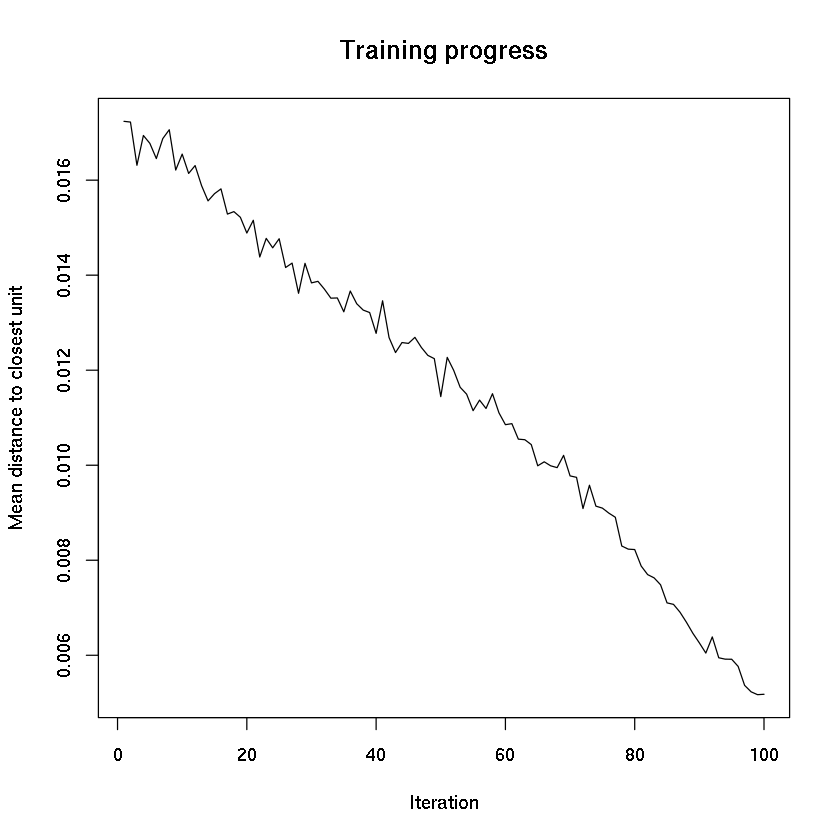

In [42]:
plot(som_model, type="changes")

**Node Counts:**

The Kohonen packages allows us to visualise the count of how many samples are mapped to each node on the map. This metric can be used as a measure of map quality – ideally the sample distribution is relatively uniform. Large values in some map areas suggests that a larger map would be benificial.

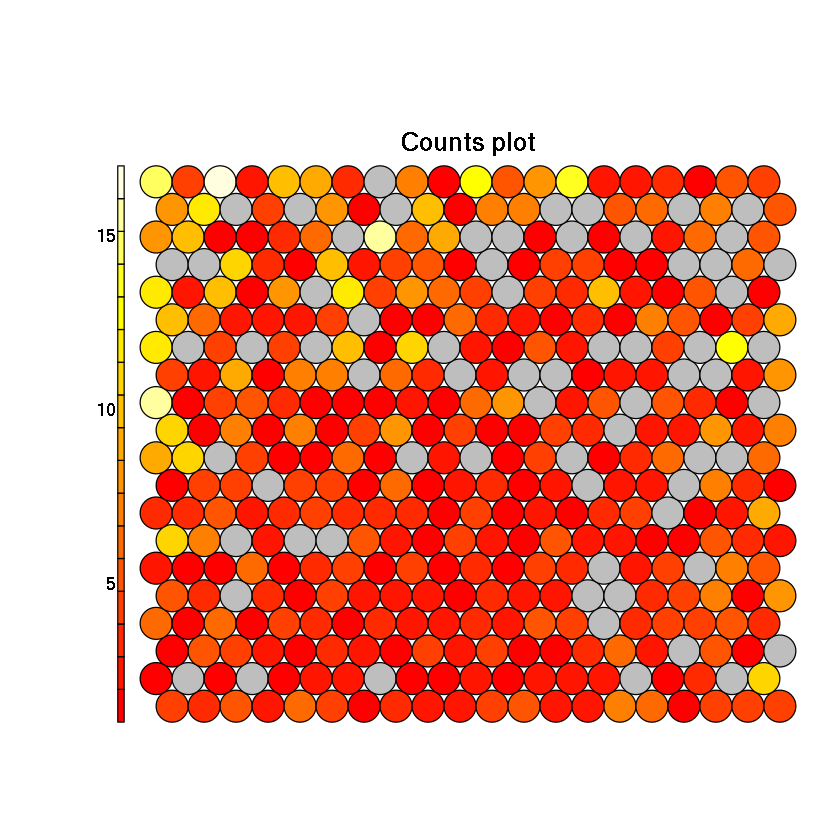

In [41]:
plot(som_model, type="count")

**Clustering:**

Clustering can be performed on the SOM nodes to isolate groups of samples with similar metrics. Manual identification of clusters is completed by exploring the heatmaps for a number of variables and drawing up a “story” about the different areas on the map. 

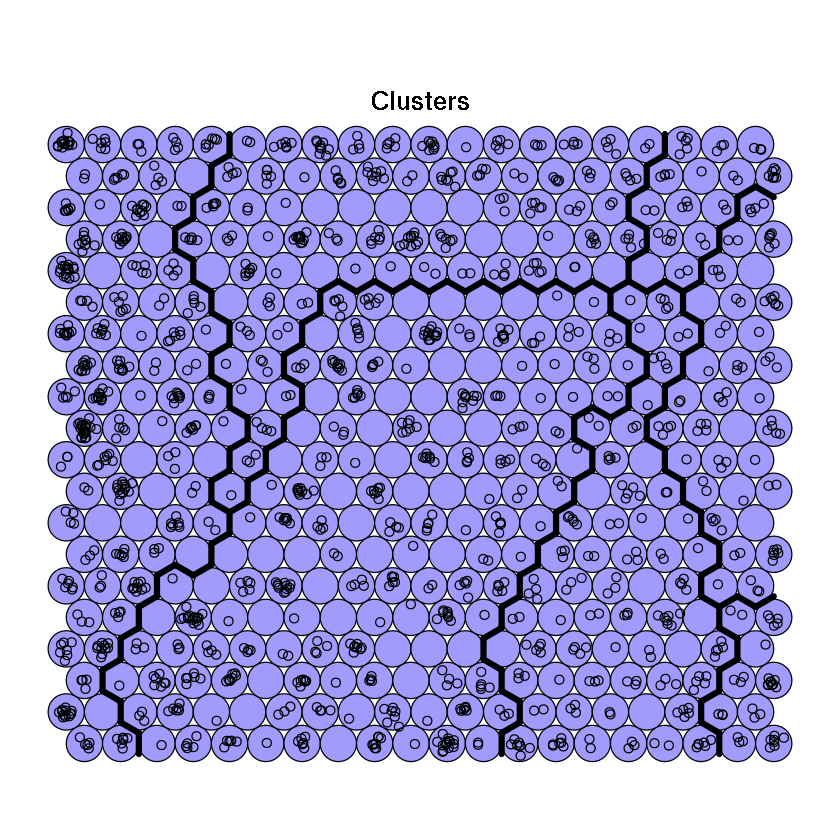

In [47]:
codes <- as.matrix(som_model$codes[[1]])
mydata <- codes 
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var)) 
for (i in 2:15) {
  wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
}
# plot(wss)
## use hierarchical clustering to cluster the codebook vectors
som_cluster <- cutree(hclust(dist(codes)), 6)
# plot these results:
plot(som_model, type="mapping", bgcol = '#a29bfe', main = "Clusters") 
add.cluster.boundaries(som_model, som_cluster)

# Aplicando reglas de asociación | A priori

In [30]:
# Read that csv back in
tr <- read.transactions("credit_g_smoothed.csv", format = "basket", sep=",")
tr

Warning message in asMethod(object):
“removing duplicated items in transactions”

transactions in sparse format with
 1301 transactions (rows) and
 3546 items (columns)

In [32]:
## Apriori with defaults.
#data("purpouse")
## Mine association rules.
rules <- apriori(tr, parameter = list(supp = 0.5, conf = 0.9, target = "rules"))
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 650 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3546 item(s), 1301 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [96 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 96 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4 
 3 29 46 18 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.823   3.000   4.000 

summary of quality measures:
    support         confidence          lift            count       
 Min.   :0.5073   Min.   :0.9069   Min.   :0.9816   Min.   : 660.0  
 1st Qu.:0.5511   1st Qu.:0.9401   1st Qu.:0.9984   1st Qu.: 717.0  
 Median :0.5980   Median :0.9787   Median :1.0012   Median : 778.0  
 Mean   :0.6320   Mean   :0.9647   Mean   :1.0012   Mean   : 822.3  
 3rd Qu.:0.6555   3rd Qu.:0.9912   3rd Qu.:1.0034   3rd Qu.: 852.8  
 Max.   :0.9915   Max.   :0.9950   Max.   :1.0351   Max.   :1290.0  

mining info:
 data ntransactions support confidence
   tr          1301     0.5        0.9